# Решение жесткой системы методом Рунге-Кутты 4-го порядка

Решим систему:

$$dy_1/dt = y_3$$
$$dy_2/dt = y_4$$
$$dy_3/dt = -{y_1 \over (y_1^2 + y_2^2)^{3/2}}$$
$$dy_4/dt = -{y_2 \over (y_1^2 + y_2^2)^{3/2}}$$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def differentiation_model(t, y):
    y_der = np.zeros(4)
    y_der[0] = y[2]
    y_der[1] = y[3]
    y_der[2] = -y[0] / (y[0]**2 + y[1]**2)**1.5
    y_der[3] = -y[1] / (y[0]**2 + y[1]**2)**1.5
    return y_der

Используем метод Рунге-Кутты 4 порядка:

In [2]:
def runge_kutta_4(y, t, h, func):
    k1 = h * func(t, y)
    k2 = h * func(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * func(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * func(t + h, y + k3)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.

И используем метод Адамса 3-го порядка

In [3]:
def adams_3(y, t, h, f):
    return y[2] + h * (23/12 * f(t[2], y[2]) - 16/12 * f(t[1], y[1]) + 5/12 * f(t[0], y[0]))

Выбор номера y, которая будет выведена на графике осуществим здесь:

In [4]:
y_chs = 1

Зададим начальные значения y и длину отрезка интегрирования:

In [5]:
y = [0.5, 0., 0., 1.73]
t = 0.
t_max = 20.
t_span = [t, t_max]

Для начала решим систему методом Рунге-Кутты 4-го порядка из библиотеки scipy:

In [6]:
res = solve_ivp(differentiation_model, t_span, y, method='RK45')

Теперь решим при помощи теода Адамса, причем первые три решения найдем при помощи метода рунге-кутты:

In [7]:
solution = []
solution.append(y)
dt = t_max / 100000

y_data_ad = []
t_data_ad = []

t_adams = [t, t, t] # можем написать так, потому что в функции вычисления не используется t

print(solution[0])

for i in range(3):
    y = runge_kutta_4(solution[i], t, dt, differentiation_model)
    y_data_ad.append(y[y_chs])
    t_data_ad.append(t)
    solution.append(y)
    t += dt
i = 3
while t <= t_max:
    y_prev = [solution[i - 2], solution[i - 1], solution[i]]
    y = adams_3(y_prev, t_adams, dt, differentiation_model)
    solution.append(y)
    t_data_ad.append(t)
    y_data_ad.append(y[y_chs])
    t += dt
    i += 1

[0.5, 0.0, 0.0, 1.73]


Теперь решим при помощи нашего метода Рунге-Кутты 4-го порядка:

In [8]:
t = 0.
y = [0.5, 0., 0., 1.73]
y_data, t_data = [], []

y_data.append(y[y_chs])
t_data.append(t)
while t <= t_max:
    t += dt
    y = runge_kutta_4(y, t, dt, differentiation_model)
    y_data.append(y[y_chs])
    t_data.append(t)

Теперь выведем данные на графике:

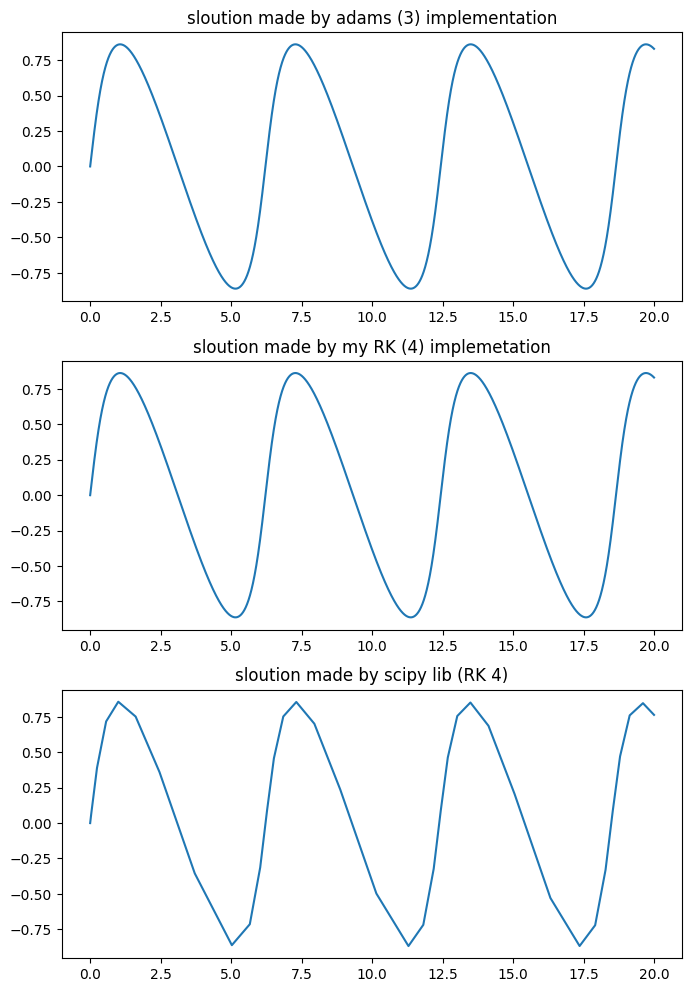

In [9]:
figure, axis = plt.subplots(3, 1, figsize = (7, 10))

axis[1].plot(t_data, y_data)
axis[1].set_title("sloution made by my RK (4) implemetation")
axis[2].plot(res.t, res.y[y_chs])
axis[2].set_title("sloution made by scipy lib (RK 4)")
axis[0].plot(t_data_ad, y_data_ad)
axis[0].set_title("sloution made by adams (3) implementation")
figure.tight_layout(pad=1.0)
plt.show()